In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# Cleaning

In [129]:
df = pd.read_csv('./dataset/All.csv')

C:\Users\ao322\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [130]:
pd.set_option('display.max_columns', 50)

In [131]:
df.head()

,Unnamed: 0,cm_mkey,cm_closed,cm_completionStatus,cm_hasSafetyRec,cm_highestInjury,cm_isStudy,cm_mode,cm_ntsbNum,cm_originalPublishedDate,cm_mostRecentReportType,cm_probableCause,cm_city,cm_country,cm_eventDate,cm_state,cm_agency,cm_boardLaunch,cm_boardMeetingDate,cm_docketDate,cm_eventType,cm_launch,cm_reportDate,cm_reportNum,cm_reportType,airportId,airportName,analysisNarrative,factualNarrative,prelimNarrative,cm_fatalInjuryCount,cm_minorInjuryCount,cm_seriousInjuryCount,accidentSiteCondition,cm_docketOriginalPublishDate,cm_recentReportPublishDate,make,model,registrationNumber,numberOfEngines,operatorName,registeredOwner,flightOperationType,flightScheduledType,revenueSightseeing,secondPilotPresent
0,NaN,78289.0,True,Completed,False,None,False,Aviation,OPS11IA273,2011-10-03T04:00:00Z,Final,The driver of the operation vehicle's misident...,Denver,USA,2010-12-31T21:34:00Z,CO,NTSB,0.0,NaN,NaN,INC,NaN,2011-10-03T04:00:00Z,NaN,DirectorBrief,KDEN,Denver Intrenational Airport,A runway incursion occurred when an aviation o...,"Air Canada Flight (ACA) number 1072, an Embrae...",NaN,0.0,0.0,0.0,IMC,2011-08-19T14:39:00Z,NaN,EMBRAER,ERJ190,C-FHKA,NaN,Air Canada,Air Canada,NaN,SCHD,False,True
1,NaN,78090.0,True,Completed,False,None,False,Aviation,ERA11LA105,2011-08-22T04:00:00Z,Final,The pilot’s improper touchdown speed which res...,Dublin,USA,2010-12-31T17:30:00Z,NC,NTSB,0.0,NaN,NaN,ACC,NaN,2011-08-22T04:00:00Z,NaN,DirectorBrief,NC82,Dublin Field,The pilot was repositioning the airplane to an...,"On December 31, 2010, about 1630 eastern stand...",NaN,0.0,0.0,0.0,VMC,2011-06-23T18:17:00Z,NaN,CESSNA,172,N4383Q,1.0,Bladen Aviation Inc,Bladen Aviation Inc,PERS,NaN,False,False
2,NaN,78148.0,True,Completed,False,None,False,Aviation,WPR11CA097,2011-05-26T04:00:00Z,Final,The pilot's failure to maintain directional co...,Flagstaff,USA,2010-12-31T15:50:00Z,AZ,NTSB,0.0,NaN,NaN,ACC,NaN,2011-05-26T04:00:00Z,NaN,DirectorBrief,FLG,Flagstaff Pulliam Airport,After completing a local area flight in the ta...,The certificated private-pilot reported in his...,NaN,0.0,0.0,0.0,VMC,2011-02-07T16:29:00Z,NaN,CESSNA,180,N67F,1.0,NaN,NaN,PERS,NaN,False,True
3,NaN,78077.0,True,Completed,False,Fatal,False,Aviation,ERA11FA101,2012-11-26T05:00:00Z,Final,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,NTSB,0.0,NaN,NaN,ACC,Yes,2012-11-26T05:00:00Z,NaN,DirectorBrief,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,VMC,2012-10-03T19:02:00Z,NaN,CESSNA,172H,N2876L,1.0,PRICE MICHAEL W,PRICE MICHAEL W,PERS,NaN,False,False
4,NaN,78077.0,True,Completed,False,Fatal,False,Aviation,ERA11FA101,2012-11-26T05:00:00Z,Final,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,NTSB,0.0,NaN,NaN,ACC,Yes,2012-11-26T05:00:00Z,NaN,DirectorBrief,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,VMC,2012-10-03T19:02:00Z,NaN,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2,N312PH,2.0,PHI Inc,PHI INC,POSI,NaN,False,False


In [132]:
df.shape

(19902, 46)

In [133]:
df = df[['cm_hasSafetyRec', 'cm_probableCause', 'cm_city', 'cm_country', 'cm_eventDate', 'cm_state', 'cm_agency', 
        'cm_eventType', 'airportId', 'airportName', 'analysisNarrative', 'factualNarrative', 'cm_fatalInjuryCount', 
        'cm_minorInjuryCount', 'cm_seriousInjuryCount', 'accidentSiteCondition', 'make', 'model', 'registrationNumber', 
        'numberOfEngines', 'operatorName', 'registeredOwner', 'flightOperationType', 'flightScheduledType',
        'revenueSightseeing', 'secondPilotPresent']]

In [134]:
df.columns

Index(['cm_hasSafetyRec', 'cm_probableCause', 'cm_city', 'cm_country',
       'cm_eventDate', 'cm_state', 'cm_agency', 'cm_eventType', 'airportId',
       'airportName', 'analysisNarrative', 'factualNarrative',
       'cm_fatalInjuryCount', 'cm_minorInjuryCount', 'cm_seriousInjuryCount',
       'accidentSiteCondition', 'make', 'model', 'registrationNumber',
       'numberOfEngines', 'operatorName', 'registeredOwner',
       'flightOperationType', 'flightScheduledType', 'revenueSightseeing',
       'secondPilotPresent'],
      dtype='object')

In [135]:
df.isnull().sum()

cm_hasSafetyRec              0
cm_probableCause          5144
cm_city                      7
cm_country                   0
cm_eventDate                 0
cm_state                  3308
cm_agency                   52
cm_eventType                 2
airportId                 7737
airportName               7629
analysisNarrative         5503
factualNarrative          3447
cm_fatalInjuryCount        146
cm_minorInjuryCount        146
cm_seriousInjuryCount      146
accidentSiteCondition     3308
make                        27
model                       36
registrationNumber          31
numberOfEngines           3066
operatorName              9289
registeredOwner           9218
flightOperationType       3735
flightScheduledType      17868
revenueSightseeing        2199
secondPilotPresent        3157
dtype: int64

In [136]:
df[(df['cm_fatalInjuryCount'].isnull()) & (df['cm_minorInjuryCount'].isnull()) & (df['cm_seriousInjuryCount'].isnull())]
# all 3 columns have the same 146 null rows.  will delete rows in next cells

,cm_hasSafetyRec,cm_probableCause,cm_city,cm_country,cm_eventDate,cm_state,cm_agency,cm_eventType,airportId,airportName,analysisNarrative,factualNarrative,cm_fatalInjuryCount,cm_minorInjuryCount,cm_seriousInjuryCount,accidentSiteCondition,make,model,registrationNumber,numberOfEngines,operatorName,registeredOwner,flightOperationType,flightScheduledType,revenueSightseeing,secondPilotPresent
10366,False,The captain’s inadvertent turn onto the incorr...,San Francisco,USA,2016-12-14T18:43:00Z,CA,NTSB,INC,SFO,SAN FRANCISCO INTL,The runway incursion occurred when a CRJ inadv...,"On December 14, 2016, about 1743 Pacific stand...",NaN,NaN,NaN,VMC,BOMBARDIER INC,CL 600 2B19,N986SW,2.0,SKYWEST AIRLINES INC,WELLS FARGO BANK NORTHWEST NA TRUSTEE,NaN,SCHD,False,True
10367,False,The captain’s inadvertent turn onto the incorr...,San Francisco,USA,2016-12-14T18:43:00Z,CA,NTSB,INC,SFO,SAN FRANCISCO INTL,The runway incursion occurred when a CRJ inadv...,"On December 14, 2016, about 1743 Pacific stand...",NaN,NaN,NaN,VMC,BOEING,737,UNK,NaN,UNITED AIR LINES INC,Unk,NaN,SCHD,False,True
10571,False,The air traffic controller issuing the aircra...,Westfield,USA,2016-10-21T08:22:00Z,MA,NTSB,INC,BAF,WESTFIELD-BARNES RGNL,The air traffic control tower was operating wi...,"On October 21, 2016, at about 0822 eastern day...",NaN,NaN,NaN,IMC,DOUGLAS,DC 9 83,N425NV,NaN,ALLEGIANT AIR LLC,SUNRISE ASSET MANAGEMENT LLC,NaN,NSCH,False,True
11829,False,The air traffic controller's decision to clear...,Honolulu,USA,2016-02-25T16:48:00Z,HI,NTSB,INC,HNL,HONOLULU INTL,Runway 22 left/right and 26 left/right were be...,"On Friday, February 26, 2016 at 1548 Hawaii st...",NaN,NaN,NaN,VMC,CESSNA,172S,N269ME,1.0,NaN,NaN,PERS,NaN,False,False
11830,False,The air traffic controller's decision to clear...,Honolulu,USA,2016-02-25T16:48:00Z,HI,NTSB,INC,HNL,HONOLULU INTL,Runway 22 left/right and 26 left/right were be...,"On Friday, February 26, 2016 at 1548 Hawaii st...",NaN,NaN,NaN,VMC,CESSNA,208B,N865MA,1.0,SCHUMAN AVIATION CO LTD,SCHUMAN AVIATION CO LTD,NaN,NSCH,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,False,NaN,Sao Paulo,BR,2021-01-19T13:50:00Z,NaN,Other,INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CESSNA,208,PP-MMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19860,False,NaN,Exeter,UK,2021-01-19T03:37:00Z,NaN,Other,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOEING,737,G-JMCY,NaN,West Atlantic,NaN,NaN,NaN,NaN,NaN
19892,False,NaN,Mexico City,MX,2021-01-04T01:35:00Z,NaN,Other,INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOEING,787-8,N782AM,2.0,Wells Fargo Trust CO NA,NaN,NaN,NaN,NaN,NaN
19900,False,NaN,Pulau Indah,MY,2021-01-01T05:00:00Z,OF,Other,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROBINSON,R66,9M-SAW,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df[df['cm_fatalInjuryCount'].isnull()].index

Int64Index([10366, 10367, 10571, 11829, 11830, 12025, 13193, 13194, 14313,
            14314,
            ...
            19811, 19820, 19832, 19834, 19855, 19856, 19860, 19892, 19900,
            19901],
           dtype='int64', length=146)

In [138]:
df.drop(index=df[df['cm_fatalInjuryCount'].isnull()].index, inplace=True)

In [139]:
df.shape

(19756, 26)

In [140]:
new_columns_dict = {
    'cm_hasSafetyRec': 'has_safety_rec',
    'cm_probableCause': 'probable_cause',
    'cm_city': 'city',
    'cm_country': 'country',
    'cm_eventDate': 'date',
    'cm_state': 'state',
    'cm_agency': 'agency',
    'cm_eventType': 'event_type',
    'airportId': 'airport_id',
    'airportName': 'airport_name',
    'analysisNarrative': 'analysis_narrative',
    'factualNarrative': 'factual_narrative',
    'cm_fatalInjuryCount': 'fatalities',
    'cm_minorInjuryCount': 'minor_injuries',
    'cm_seriousInjuryCount': 'serious_injuries',
    'accidentSiteCondition': 'flight_condition',
    'make': 'make',
    'model': 'model',
    'registrationNumber': 'registration',
    'numberOfEngines': 'engine_count',
    'operatorName': 'operator',
    'registeredOwner': 'owner',
    'flightOperationType': 'flight_operation',
    'flightScheduledType': 'flight_scheduling', 
    'revenueSightseeing': 'sightseeing',
    'secondPilotPresent': 'second_pilot'
}

df.rename(columns=new_columns_dict, inplace=True)

In [141]:
df.isnull().sum()

has_safety_rec            0
probable_cause         5006
city                      7
country                   0
date                      0
state                  3208
agency                   52
event_type                2
airport_id             7614
airport_name           7502
analysis_narrative     5365
factual_narrative      3309
fatalities                0
minor_injuries            0
serious_injuries          0
flight_condition       3171
make                     27
model                    36
registration             31
engine_count           2943
operator               9208
owner                  9114
flight_operation       3597
flight_scheduling     17750
sightseeing            2075
second_pilot           3026
dtype: int64

In [142]:
df['probable_cause'].str.contains('N/A').value_counts()

False    14750
Name: probable_cause, dtype: int64

In [143]:
df['probable_cause'].fillna('N/A', inplace=True)

In [144]:
df = df[df['country'] == 'USA']

In [145]:
df.shape

(16473, 26)

In [146]:
df.isnull().sum()

has_safety_rec            0
probable_cause            0
city                      4
country                   0
date                      0
state                    50
agency                   48
event_type                2
airport_id             4997
airport_name           4924
analysis_narrative     2171
factual_narrative      2758
fatalities                0
minor_injuries            0
serious_injuries          0
flight_condition        419
make                      6
model                     5
registration              8
engine_count            845
operator               7529
owner                  7335
flight_operation       1091
flight_scheduling     15222
sightseeing             258
second_pilot            956
dtype: int64

In [147]:
df.drop(columns='engine_count', inplace=True)

In [148]:
df.drop(index=df[df['city'].isnull()].index, inplace=True)

In [149]:
df.drop(index=df[df['make'].isnull()].index, inplace=True)

In [150]:
df.loc[[55, 1786, 3654, 4009, 10976, 12089, 15812], 'state'] = 'VI'
df.loc[[90, 771, 881, 1104, 1912, 2146, 3274, 4117, 4916, 8167, 8685, 10158, 15793, 17972], 'state'] = 'GOM'
df.loc[[1330, 2155, 8448, 9548, 9940, 12379, 12916, 13748], 'state'] = 'GU'
df.loc[[2562], 'state'] = 'Unk'
df.loc[[3116], 'state'] = 'AL'
df.loc[[3373, 5336, 5849, 6128, 7285, 8092, 9599], 'state'] = 'LA'
df.loc[[3850, 5859, 7250, 12525, 16211, 16681], 'state'] = 'NMI'
df.loc[[14552], 'state'] = 'PO'

# researched locations of aviation accidents to fill null state values

In [151]:
df.drop(index=7284, inplace=True)  # took place in Canada, not USA

In [152]:
df.drop(index=14888, inplace=True)  # took place in Ecuador, not USA

In [153]:
df.drop(index=15660, inplace=True)  # no information except of a crash

In [154]:
df.drop(columns='agency', inplace=True)  # no distinguishing information

In [155]:
df.drop(index=df[df['event_type'] == 'OCC'].index, inplace=True)  # no information in observation and too many nulls

In [156]:
df.drop(index=df[df['event_type'].isnull()].index, inplace=True)  # only losing two rows

In [157]:
df.drop(columns='airport_id', inplace=True)  # keeping airport name and these would be same information

In [158]:
df['airport_name'].value_counts().head(60)

Private                           149
Private Airstrip                   78
None                               35
PVT                                28
RENO/STEAD                         18
Private Strip                      18
NORTH PERRY                        13
PHOENIX DEER VALLEY                13
Phoenix Deer Valley Airport        12
PRIVATE                            12
LAKE HOOD                          12
Centennial                         12
North Las Vegas                    12
VAN NUYS                           12
Falcon Field Airport               11
CENTENNIAL                         10
Fort Lauderdale Executive          10
SNOHOMISH COUNTY (PAINE FLD)       10
Centennial Airport                 10
Private airstrip                   10
FALCON FLD                         10
NONE                               10
Phoenix Deer Valley                10
Wittman Regional Airport           10
GREELEY-WELD COUNTY                10
NORTH LAS VEGAS                    10
MIAMI EXECUT

In [159]:
df['airport_name'] = df['airport_name'].str.strip()

In [160]:
df['airport_name'] = df['airport_name'].str.upper()

In [161]:
df['airport_name'].sort_values().value_counts().head(60)

PRIVATE                         164
PRIVATE AIRSTRIP                 93
NONE                             45
PVT                              29
RENO/STEAD                       25
PRIVATE STRIP                    23
PHOENIX DEER VALLEY              23
CENTENNIAL                       22
NORTH LAS VEGAS                  22
NORTH PERRY                      19
SEDONA                           17
VAN NUYS                         16
CHINO                            16
MIAMI EXECUTIVE                  15
FORT LAUDERDALE EXECUTIVE        15
MERRILL FIELD                    15
LAKE HOOD                        15
ROCKY MOUNTAIN METROPOLITAN      14
RYAN FIELD                       14
DAVID WAYNE HOOKS MEMORIAL       14
CALDWELL INDUSTRIAL              14
MINDEN-TAHOE                     13
GREELEY-WELD COUNTY              13
VANCE BRAND                      13
ZAMPERINI FIELD                  12
ALBERT WHITTED                   12
FALCON FLD                       12
CAMARILLO                   

In [162]:
df['airport_name'].fillna('UNKNOWN', inplace=True)

In [163]:
df.loc[df[df['airport_name'].str.contains('PRIV')].index, 'airport_name'] = 'PRIVATE AIRPORT'

In [164]:
df.loc[df[df['airport_name'].str.contains('PVT')].index, 'airport_name'] = 'PRIVATE AIRPORT'

In [165]:
df.isnull().sum()

has_safety_rec            0
probable_cause            0
city                      0
country                   0
date                      0
state                     0
event_type                0
airport_name              0
analysis_narrative     2164
factual_narrative      2754
fatalities                0
minor_injuries            0
serious_injuries          0
flight_condition        411
make                      0
model                     0
registration              4
operator               7522
owner                  7329
flight_operation       1081
flight_scheduling     15213
sightseeing             253
second_pilot            950
dtype: int64

In [166]:
df['analysis_narrative'].str.contains('N/A').value_counts()

False    14293
Name: analysis_narrative, dtype: int64

In [167]:
df['analysis_narrative'].fillna('N/A', inplace=True)

In [168]:
df['factual_narrative'].str.contains('N/A').value_counts()

False    13694
True         9
Name: factual_narrative, dtype: int64

In [169]:
df['factual_narrative'].fillna('N/A', inplace=True)

In [170]:
df[(df['factual_narrative'] != 'N/A') & (df['factual_narrative'].str.contains('N/A'))]
# check on the 9 columns that already had 'N/A' in the string.  All have narratives included

,has_safety_rec,probable_cause,city,country,date,state,event_type,airport_name,analysis_narrative,factual_narrative,fatalities,minor_injuries,serious_injuries,flight_condition,make,model,registration,operator,owner,flight_operation,flight_scheduling,sightseeing,second_pilot
3103,False,The pilot’s failure to ensure that the governo...,Victoria,USA,2011-05-16T13:05:00Z,TX,ACC,UNKNOWN,"Shortly after departure, the pilot observed th...","On May 16, 2011, about 1305 central daylight t...",0.0,0.0,0.0,VMC,MD HELICOPTER,369E,N4278T,NaN,NaN,OWRK,NaN,False,False
3199,False,The flight crew's delayed deployment of the sp...,Chicago,USA,2011-04-26T13:33:00Z,IL,INC,CHICAGO MIDWAY,The flight was routine until nearing the Chica...,"HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn April 26, ...",0.0,0.0,0.0,IMC,BOEING,737-7Q8,N799SW,SOUTHWEST AIRLINES CO,CASTLE 2003-1A LLC,NaN,SCHD,False,True
3624,False,A total loss of engine power resulting from th...,Cross City,USA,2011-01-27T20:19:00Z,FL,ACC,UNKNOWN,The airplane’s engine lost power during cruise...,HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn January 27...,0.0,0.0,0.0,VMC,CIRRUS DESIGN CORP,SR22,N8135B,Deep South Express LLC,Deep South Express LLC,PERS,NaN,False,False
3702,False,the early rotation of the airplane to an angle...,Los Angeles,USA,2011-01-03T11:17:00Z,CA,ACC,LOS ANGELES,The crew reported that preflight preparation w...,"HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn January 3,...",0.0,0.0,0.0,VMC,BOEING,737-823,N831NN,American Airlines,AMERICAN AIRLINES INC,NaN,SCHD,False,True
7232,False,The pilot's failure to maintain adequate airsp...,Boonville,USA,2014-11-30T09:57:00Z,MO,ACC,JESSE VIERTEL MEMORIAL AIRPORT,The commercial pilot was on a cross-country fl...,According to available air traffic control dat...,1.0,0.0,3.0,VMC,BELLANCA,17-30A,N6629V,NaN,NaN,PERS,NaN,False,False
8735,False,The pilot/owner's failure to maintain the engi...,Guanica,USA,2015-12-19T12:20:00Z,PR,ACC,UNKNOWN,The sport pilot was conducting a cross-country...,"On December 19, 2015, about 1120 Atlantic stan...",0.0,0.0,0.0,VMC,PORRATA LUIS G,RANS S 12XL,N124LP,NaN,NaN,PERS,NaN,False,False
9900,False,The helicopter rescue specialist was not prope...,Austin,USA,2015-04-27T21:50:00Z,TX,ACC,UNKNOWN,"A helicopter with a pilot, a hoist operator, a...","HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn April 27, ...",1.0,0.0,0.0,VMC,EUROCOPTER DEUTSCHLAND GMBH,MBB BK 117 C-2,N392TC,Star Flight,TRAVIS COUNTY PURCHASING OFFICE,PUBL,NaN,False,False
18332,False,N/A,Johnson Valley,USA,2020-02-06T13:00:00Z,CA,INC,UNKNOWN,N/A,HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn February 6...,0.0,0.0,0.0,VMC,AEROSPATIALE,AS350BA,N611TC,Icon Helicopters Llc,Icon Helicopters Llc,AOBV,NaN,False,NaN
18333,False,N/A,Johnson Valley,USA,2020-02-06T13:00:00Z,CA,INC,UNKNOWN,N/A,HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn February 6...,0.0,0.0,0.0,VMC,DJI,Mavic,FA37NAYXP9,NaN,NaN,AOBV,NaN,False,False


In [171]:
df[(df['flight_condition'].isnull()) & (df['probable_cause'] == 'N/A') & (df['analysis_narrative'] == 'N/A') & (df['factual_narrative'] == 'N/A')]
# check to see how many of the nulls do not have a probable cause, analysis narrative, and factual narrative

,has_safety_rec,probable_cause,city,country,date,state,event_type,airport_name,analysis_narrative,factual_narrative,fatalities,minor_injuries,serious_injuries,flight_condition,make,model,registration,operator,owner,flight_operation,flight_scheduling,sightseeing,second_pilot
12105,False,N/A,Rio Oso,USA,2017-12-04T08:20:00Z,CA,ACC,UNKNOWN,N/A,N/A,0.0,1.0,0.0,NaN,BEECH,A36,N251E,NaN,NaN,PERS,NaN,False,False
12123,False,N/A,Truckee,USA,2017-11-30T16:40:00Z,CA,ACC,UNKNOWN,N/A,N/A,0.0,0.0,2.0,NaN,ROBINSON HELICOPTER COMPANY,R22,N47WH,TUMBLEWEED LEASING CO INC,TUMBLEWEED LEASING CO INC,PERS,NaN,False,True
12127,False,N/A,Atlanta,USA,2017-11-29T17:06:00Z,GA,INC,UNKNOWN,N/A,N/A,0.0,0.0,0.0,NaN,BOEING,737-932ER,N852DN,Delta Air Lines,DELTA AIR LINES INC,NaN,SCHD,False,True
12133,False,N/A,Jamaica,USA,2017-11-27T20:45:00Z,NY,ACC,JOHN F KENNEDY INTERNATIONAL,N/A,N/A,0.0,0.0,0.0,NaN,BOEING,777,SU-GDL,Egypt Airlines,Egypt Airlines,NaN,SCHD,False,True
12134,False,N/A,Jamaica,USA,2017-11-27T20:45:00Z,NY,ACC,JOHN F KENNEDY INTERNATIONAL,N/A,N/A,0.0,0.0,0.0,NaN,AIRBUS,A330,G-VRAY,Virgin Atlantic Airways LTD,Aercap,NaN,SCHD,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,False,N/A,Grand Haven,USA,2021-03-02T16:49:00Z,MI,ACC,MUSKEGON COUNTY,N/A,N/A,0.0,0.0,0.0,NaN,CESSNA,210,N6637X,NaN,LEALE BRIAN M,PERS,NaN,False,False
19743,False,N/A,Livermore,USA,2021-02-23T18:00:00Z,CA,ACC,LIVERMORE MUNI,N/A,N/A,0.0,0.0,0.0,NaN,MOONEY,M20E,N3254F,NaN,NaN,PERS,NaN,False,False
19756,False,N/A,Broomfield,USA,2021-02-20T14:09:00Z,CO,INC,UNKNOWN,N/A,N/A,0.0,0.0,0.0,NaN,BOEING,777-222,N772UA,United Airlines,United Airlines,NaN,SCHD,False,True
19761,False,N/A,Jeffersonville,USA,2021-02-18T20:05:00Z,IN,ACC,CLARK RGNL,N/A,N/A,0.0,0.0,0.0,NaN,GATES LEARJET CORP,55C,N559RA,ROYAL AIR FREIGHT INC,ROYAL AIR FREIGHT INC,POSI,NSCH,False,True


In [172]:
df.drop(index=df[df['flight_condition'].isnull()].index, inplace=True)

In [173]:
df['operator'] = df['operator'].str.upper()

In [174]:
df['operator'] = df['operator'].str.strip()

In [175]:
df['operator'].fillna('UNKNOWN', inplace=True)

In [176]:
df['owner'] = df['owner'].str.upper()

In [177]:
df['owner'] = df['owner'].str.strip()

In [178]:
df['owner'].fillna('UNKNOWN', inplace=True)

In [179]:
df.drop(columns='flight_scheduling', inplace=True)

In [180]:
df.drop(index=df[df['registration'].isnull()].index, inplace=True)

In [181]:
df.drop(index=df[df['flight_operation'].isnull()].index, inplace=True)

In [182]:
df.drop(index=df[df['sightseeing'].isnull()].index, inplace=True)

In [183]:
df.drop(index=df[df['second_pilot'].isnull()].index, inplace=True)

In [184]:
df.isnull().sum()

has_safety_rec        0
probable_cause        0
city                  0
country               0
date                  0
state                 0
event_type            0
airport_name          0
analysis_narrative    0
factual_narrative     0
fatalities            0
minor_injuries        0
serious_injuries      0
flight_condition      0
make                  0
model                 0
registration          0
operator              0
owner                 0
flight_operation      0
sightseeing           0
second_pilot          0
dtype: int64

In [185]:
df.shape

(14322, 22)

---

# Preprocessing

### Creating target column

In [186]:
df['deaths_and_injuries'] = df['fatalities'] + df['minor_injuries'] + df['serious_injuries']

In [187]:
df.head()

,has_safety_rec,probable_cause,city,country,date,state,event_type,airport_name,analysis_narrative,factual_narrative,fatalities,minor_injuries,serious_injuries,flight_condition,make,model,registration,operator,owner,flight_operation,sightseeing,second_pilot,deaths_and_injuries
1,False,The pilot’s improper touchdown speed which res...,Dublin,USA,2010-12-31T17:30:00Z,NC,ACC,DUBLIN FIELD,The pilot was repositioning the airplane to an...,"On December 31, 2010, about 1630 eastern stand...",0.0,0.0,0.0,VMC,CESSNA,172,N4383Q,BLADEN AVIATION INC,BLADEN AVIATION INC,PERS,False,False,0.0
2,False,The pilot's failure to maintain directional co...,Flagstaff,USA,2010-12-31T15:50:00Z,AZ,ACC,FLAGSTAFF PULLIAM AIRPORT,After completing a local area flight in the ta...,The certificated private-pilot reported in his...,0.0,0.0,0.0,VMC,CESSNA,180,N67F,UNKNOWN,UNKNOWN,PERS,False,True,0.0
3,False,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,ACC,UNKNOWN,N/A,N/A,2.0,0.0,0.0,VMC,CESSNA,172H,N2876L,PRICE MICHAEL W,PRICE MICHAEL W,PERS,False,False,2.0
4,False,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,ACC,UNKNOWN,N/A,N/A,2.0,0.0,0.0,VMC,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2,N312PH,PHI INC,PHI INC,POSI,False,False,2.0
5,False,The mechanic/pilot's failure to detect a visib...,Wimauma,USA,2010-12-31T15:00:00Z,FL,ACC,WIMAUMA AIR PARK,"During initial climb from the airstrip, about ...","On December 31, 2010, about 1400 eastern stand...",0.0,0.0,0.0,VMC,CESSNA,152,N28BA,CIRRUS AVIATION INC,CIRRUS AVIATION INC,OWRK,False,False,0.0


In [188]:
df.to_csv('./dataset/cleaned.csv', index=False)

---

# NLP

### NLP on Probable Cause

In [189]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['probable_cause'])
probable_cause_cvec = cvec.transform(df['probable_cause'])

In [190]:
probable_cause_unigrams = pd.DataFrame(probable_cause_cvec.todense(), columns=cvec.get_feature_names())
probable_cause_unigrams

,000,10,100,11,12,13,14,15,16,17,172,18,180,182,19,1st,20,2012,2015,2016,2020,21,23,24v,270,...,workload,works,worm,worn,worsened,worsening,wreckage,wrinkling,wrist,writing,written,wrong,xm,yaw,year,years,yellow,yield,yielding,yoke,zero,zipline,zodiac,zolpidem,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
top20_pc_unis = probable_cause_unigrams.sum().sort_values(ascending=False).head(20)
top20_pc_unis

pilot           11282
failure          7153
resulted         6903
landing          6719
loss             5202
control          4938
maintain         4346
engine           4243
airplane         3823
power            3457
flight           2877
fuel             2509
directional      2167
contributing     2141
accident         2109
takeoff          1892
improper         1837
runway           1827
subsequent       1821
conditions       1578
dtype: int64

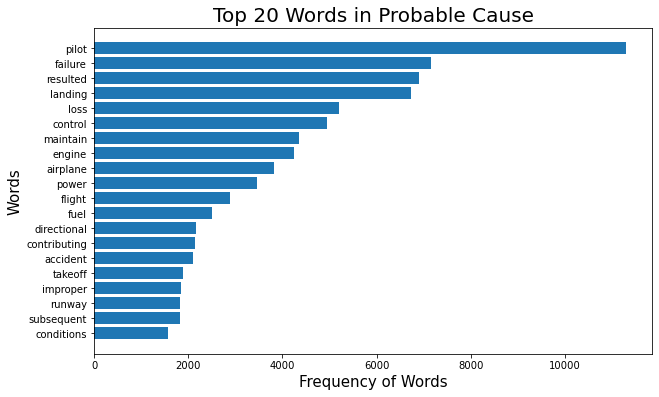

In [242]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_unis.sort_values().index, width=top20_pc_unis.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Probable Cause', size=20)
plt.savefig('./images/top20pc_words.png', bbox_inches='tight');

In [192]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2))
cvec.fit(df['probable_cause'])
probable_cause_cvec = cvec.transform(df['probable_cause'])

In [193]:
probable_cause_bigrams = pd.DataFrame(probable_cause_cvec.todense(), columns=cvec.get_feature_names())
probable_cause_bigrams

,000 rpm,10 ampere,10 feet,100 hour,100 hours,100 low,11 failure,12 500,13 airplane,14 cfr,14 code,15 2012,15 50,16 cessna,17 months,172 flight,18 2015,180 degree,180 turn,19 story,1st stage,20 knot,2012 docket,2015 docket,2016 public,...,year time,years accident,years prior,yellow crowned,yellow taxiway,yield airplane,yield taxiing,yield traffic,yielding rupture,yoke contributing,yoke correct,yoke fatigue,yoke inhibited,yoke input,yoke inputs,yoke installed,yoke lift,zero degrees,zero force,zero timed,zolpidem lorazepam,zone engine,zone resulted,zone resulting,zone runway
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
top20_pc_bis = probable_cause_bigrams.sum().sort_values(ascending=False).head(20)
top20_pc_bis

pilot failure            4689
failure maintain         3883
engine power             2897
loss engine              2806
directional control      2159
contributing accident    1937
maintain directional     1490
control landing          1355
pilot improper           1336
total loss               1294
accident pilot           1033
reasons determined        997
landing gear              968
student pilot             941
aerodynamic stall         891
pilot inadequate          808
resulted loss             767
landing roll              749
runway excursion          741
flight instructor         729
dtype: int64

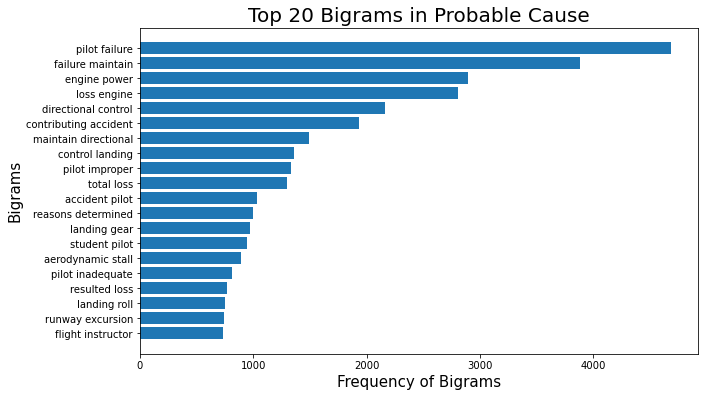

In [243]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_bis.sort_values().index, width=top20_pc_bis.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Probable Cause', size=20)
plt.savefig('./images/top20pc_bigrams.png', bbox_inches='tight');

In [195]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3))
cvec.fit(df['probable_cause'])
probable_cause_cvec = cvec.transform(df['probable_cause'])

In [196]:
probable_cause_trigrams = pd.DataFrame(probable_cause_cvec.todense(), columns=cvec.get_feature_names())
probable_cause_trigrams

,10 ampere circuit,10 feet ground,10 feet high,100 hour inspection,100 hour maintenance,100 hours required,100 low lead,11 failure maintain,12 500 feet,13 airplane failure,14 cfr 23,14 code federal,15 2012 docket,15 50 feet,16 cessna contributing,17 months accident,172 flight instructor,18 2015 docket,180 degree autorotation,180 degree return,180 degree turn,180 turn following,19 story building,1st stage compressor,1st stage gas,...,yaw subsequent loss,year limits recommended,year old airplane,year old ignition,year time limit,yellow crowned night,yellow taxiway edge,yield airplane taxiing,yield taxiing aircraft,yield traffic established,yielding rupture turbine,yoke contributing accident,yoke correct drift,yoke fatigue fracture,yoke inhibited flight,yoke inputs higher,yoke installed pilot,yoke lift feet,zero degrees resulted,zero force maneuver,zero timed company,zolpidem lorazepam diphenhydramine,zone engine did,zone resulted landing,zone resulting long
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
top20_pc_tris = probable_cause_trigrams.sum().sort_values(ascending=False).head(20)
top20_pc_tris

pilot failure maintain             3324
loss engine power                  2775
maintain directional control       1483
failure maintain directional       1381
total loss engine                  1240
directional control landing        1084
contributing accident pilot        1003
loss directional control            641
engine power fuel                   607
resulted aerodynamic stall          539
partial loss engine                 531
failure maintain adequate           512
control landing roll                496
critical angle attack               495
resulted runway excursion           477
failure maintain clearance          476
reasons determined postaccident     457
resulted hard landing               453
improper landing flare              412
precluded normal operation          397
dtype: int64

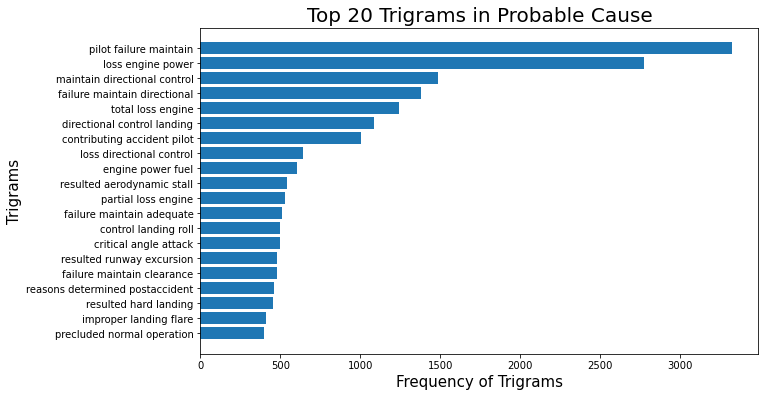

In [244]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_tris.sort_values().index, width=top20_pc_tris.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Probable Cause', size=20)
plt.savefig('./images/top20pc_trigrams.png', bbox_inches='tight');

---

### NLP on Factual Narrative

In [198]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['factual_narrative'])
factual_narrative_cvec = cvec.transform(df['factual_narrative'])

In [199]:
factual_narrative_unigrams = pd.DataFrame(factual_narrative_cvec.todense(), columns=cvec.get_feature_names())
factual_narrative_unigrams

,00,000,0000,00000kt,00001,00004,00007,0000z,0001,000119,00015,0002,000235,00024,000244915,0003,000349177,00039,0003f,0004,00040,0005,00052,000551,000594,...,zopiclone,zorix,zotmi,zovoc,zp,zph,zslc,zuehl,zulu,zumug,zuni,zurich,zvf,zweibruken,zwiebelturm,zyban,zyfs200k,zyglo,zygloe,zyloprim,zyr,zyrtec,zzv,µg,µm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
top20_fn_unis = factual_narrative_unigrams.sum().sort_values(ascending=False).head(20)
top20_fn_unis

x0d         217929
airplane    105347
pilot        97871
flight       65308
engine       59113
accident     42146
fuel         40004
time         29292
left         29119
reported     28658
landing      28465
right        26551
runway       25284
airport      21848
wing         20428
feet         20290
damage       19930
hours        18914
control      17855
power        16636
dtype: int64

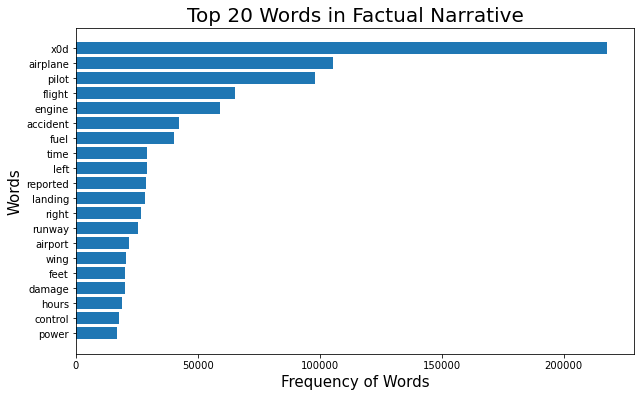

In [245]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_unis.sort_values().index, width=top20_fn_unis.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Factual Narrative', size=20)
plt.savefig('./images/top20fn_words.png', bbox_inches='tight');

In [201]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)
cvec.fit(df['factual_narrative'])
factual_narrative_cvec = cvec.transform(df['factual_narrative'])

In [202]:
factual_narrative_bigrams = pd.DataFrame(factual_narrative_cvec.todense(), columns=cvec.get_feature_names())
factual_narrative_bigrams

,000 000,000 feet,000 foot,000 ft,000 hours,000 rpm,000 total,020 degrees,09 35,10 000,10 15,10 2010,10 2011,10 2014,10 degrees,10 feet,10 ft,10 gallons,10 hours,10 inches,10 knots,10 miles,10 minutes,10 seconds,10 statute,...,x0d takeoff,x0d telephone,x0d test,x0d tests,x0d throttle,x0d time,x0d toxicological,x0d toxicology,x0d upper,x0d vertical,x0d video,x0d visual,x0d weather,x0d weight,x0d wind,x0d wing,x0d wings,x0d witness,x0d witnesses,x0d wreckage,x0d written,x0d x0d,yawed left,year old,µg ml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
top20_fn_bis = factual_narrative_bigrams.sum().sort_values(ascending=False).head(20)
top20_fn_bis

x0d x0d                      106998
pilot reported                12401
landing gear                  10738
x0d pilot                      9984
accident site                  7886
substantial damage             7704
x0d according                  6966
code federal                   6675
federal regulations            6649
14 code                        6643
information x0d                6436
meteorological conditions      6436
remained attached              6432
flight plan                    6382
time accident                  6298
federal aviation               6081
left wing                      5953
aviation administration        5912
visual meteorological          5815
conditions prevailed           5729
dtype: int64

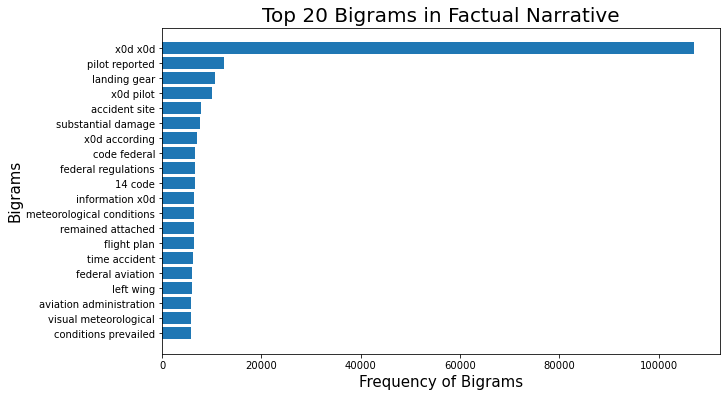

In [246]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_bis.sort_values().index, width=top20_fn_bis.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Factual Narrative', size=20)
plt.savefig('./images/top20fn_bigrams.png', bbox_inches='tight');

In [204]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3), max_features=5000)
cvec.fit(df['factual_narrative'])
factual_narrative_cvec = cvec.transform(df['factual_narrative'])

In [205]:
factual_narrative_trigrams = pd.DataFrame(factual_narrative_cvec.todense(), columns=cvec.get_feature_names())
factual_narrative_trigrams

,00 inches mercury,000 000 feet,000 feet agl,000 feet broken,000 feet ground,000 feet long,000 feet mean,000 feet minute,000 feet msl,000 feet overcast,000 feet pilot,000 feet runway,000 feet temperature,000 feet x0d,000 foot long,000 ft agl,000 ft ground,000 ft mean,000 ft msl,000 ft pilot,000 ft temperature,000 ft x0d,000 hours total,000 total hours,01 inches mercury,...,x0d x0d terminal,x0d x0d test,x0d x0d testing,x0d x0d tests,x0d x0d throttle,x0d x0d time,x0d x0d toxicological,x0d x0d toxicology,x0d x0d upper,x0d x0d vacuum,x0d x0d vertical,x0d x0d video,x0d x0d visual,x0d x0d warning,x0d x0d weather,x0d x0d weight,x0d x0d wind,x0d x0d wing,x0d x0d wings,x0d x0d witness,x0d x0d witnesses,x0d x0d wreckage,x0d x0d written,x0d x0d x0d,year old pilot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
top20_fn_tris = factual_narrative_trigrams.sum().sort_values(ascending=False).head(20)
top20_fn_tris

x0d x0d pilot                          9363
x0d x0d x0d                            6952
code federal regulations               6636
14 code federal                        6633
x0d x0d according                      6550
information x0d x0d                    6094
federal aviation administration        5911
visual meteorological conditions       5790
meteorological conditions prevailed    5584
sustained substantial damage           5440
federal regulations 91                 5329
x0d x0d airplane                       5177
precluded normal operation             4639
flight plan filed                      4533
aviation administration faa            3798
x0d pilot reported                     3784
main landing gear                      3344
conditions prevailed flight            3337
airplane sustained substantial         3291
x0d x0d examination                    3162
dtype: int64

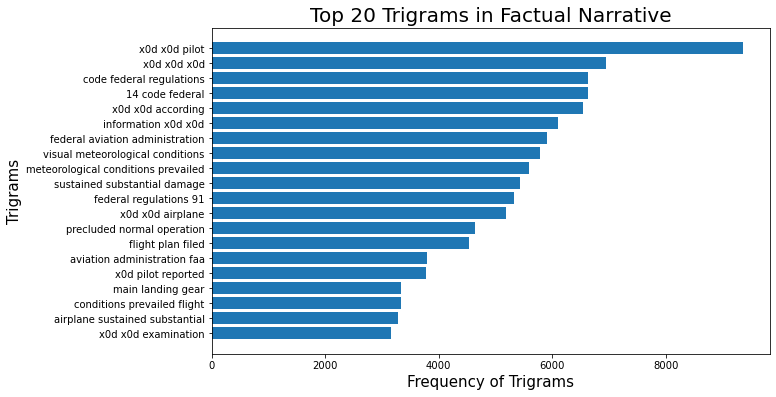

In [247]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_tris.sort_values().index, width=top20_fn_tris.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Factual Narrative', size=20)
plt.savefig('./images/top20fn_trigrams.png', bbox_inches='tight');

---

### NLP on Analysis Narrative

In [207]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['analysis_narrative'])
analysis_narrative_cvec = cvec.transform(df['analysis_narrative'])

In [208]:
analysis_narrative_unigrams = pd.DataFrame(analysis_narrative_cvec.todense(), columns=cvec.get_feature_names())
analysis_narrative_unigrams

,00,000,0008,000ft,000rpm,001,0013,0015,002,003,0030,004,005,0055,0060,00625,008,009,00x6,01,010,0100,010º,011,0110,...,young,younger,youtube,ypg,yuma,yup,yxu,zab,zerk,zero,zigzag,zinc,zip,zipline,zoloft,zolpidem,zone,zones,zoom,zoomed,zulu,zurich,zyban,zyrtec,µg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
top20_an_unis = analysis_narrative_unigrams.sum().sort_values(ascending=False).head(20)
top20_an_unis

airplane       52282
pilot          45809
x0d            29843
engine         20950
flight         18544
landing        17469
reported       17135
runway         14015
fuel           13429
left           13237
accident       12862
power          11532
right          11482
examination     8332
normal          8316
damage          7935
airport         7825
revealed        7750
mechanical      7628
ground          7500
dtype: int64

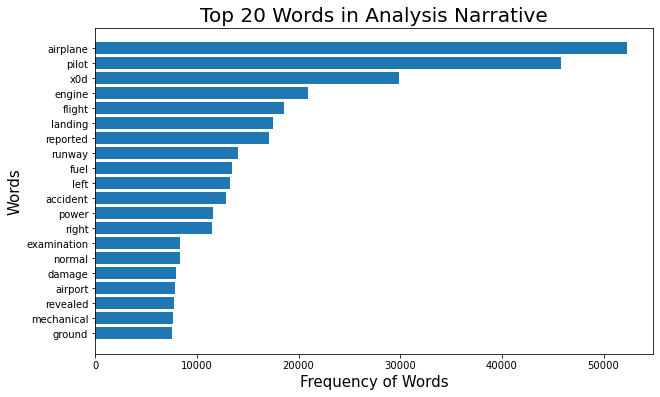

In [298]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_unis.sort_values().index, width=top20_an_unis.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Analysis Narrative', size=20)
plt.savefig('./images/top20an_words.png', bbox_inches='tight');

In [210]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)
cvec.fit(df['analysis_narrative'])
analysis_narrative_cvec = cvec.transform(df['analysis_narrative'])

In [211]:
analysis_narrative_bigrams = pd.DataFrame(analysis_narrative_cvec.todense(), columns=cvec.get_feature_names())
analysis_narrative_bigrams

,000 feet,000 foot,000 ft,000 hours,000 rpm,10 000,10 15,10 degrees,10 feet,10 ft,10 gallons,10 knots,10 miles,10 minutes,10 seconds,100 200,100 feet,100 ft,100 hour,100 knots,11 knots,12 000,12 gallons,12 knots,12 miles,...,x0d pilots,x0d post,x0d postaccident,x0d radar,x0d recommendation,x0d review,x0d right,x0d student,x0d time,x0d toxicological,x0d toxicology,x0d weather,x0d witness,x0d witnesses,x0d wreckage,x0d x0d,yaw left,yaw right,yawed left,yawed right,year accident,year old,years accident,years prior,yoke airplane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [235]:
top20_an_bis = analysis_narrative_bigrams.sum().sort_values(ascending=False).head(20)
top20_an_bis

x0d x0d                     14760
pilot reported              10241
precluded normal             6419
normal operation             6374
substantial damage           5746
landing gear                 5518
mechanical malfunctions      3684
postaccident examination     3660
sustained substantial        3587
engine power                 3486
x0d pilot                    2925
malfunctions failures        2922
flight instructor            2879
left wing                    2827
airplane precluded           2585
right wing                   2518
airplane sustained           2447
pilot stated                 2418
student pilot                2362
time accident                2332
dtype: int64

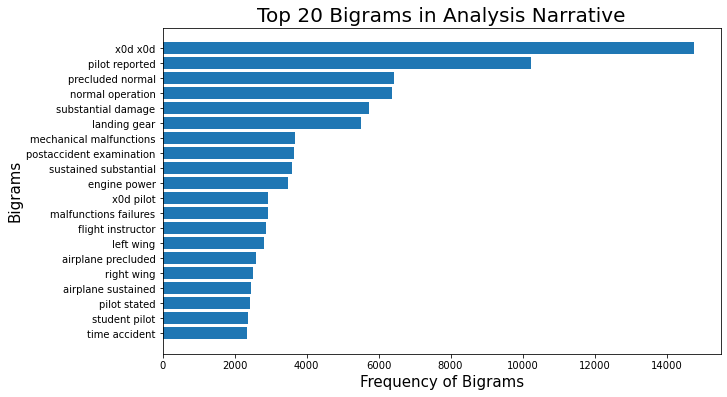

In [296]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_bis.sort_values().index, width=top20_an_bis.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Analysis Narrative', size=20)
plt.savefig('./images/top20an_bigrams.png', bbox_inches='tight');

In [213]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3), max_features=5000)
cvec.fit(df['analysis_narrative'])
analysis_narrative_cvec = cvec.transform(df['analysis_narrative'])

In [214]:
analysis_narrative_trigrams = pd.DataFrame(analysis_narrative_cvec.todense(), columns=cvec.get_feature_names())
analysis_narrative_trigrams

,000 feet ground,000 feet mean,000 feet msl,000 feet pilot,000 feet runway,000 foot long,000 ft agl,000 ft ground,000 ft long,000 ft mean,000 ft minute,000 ft msl,000 ft runway,10 000 feet,10 000 ft,10 15 feet,10 15 ft,10 15 knots,10 degrees flaps,10 feet ground,10 ft ground,10 gallons fuel,10 knots gusting,10 knots gusts,10 knots pilot,...,x0d x0d recommendation,x0d x0d recorded,x0d x0d recovery,x0d x0d reported,x0d x0d review,x0d x0d right,x0d x0d safety,x0d x0d scene,x0d x0d student,x0d x0d subsequent,x0d x0d time,x0d x0d toxicological,x0d x0d toxicology,x0d x0d vertical,x0d x0d video,x0d x0d weather,x0d x0d wind,x0d x0d witness,x0d x0d witnesses,x0d x0d wreckage,x0d x0d x0d,x0d x0d years,year old pilot,years accident engine,years prior accident
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [237]:
top20_an_tris = analysis_narrative_trigrams.sum().sort_values(ascending=False).head(20)
top20_an_tris

precluded normal operation          6181
sustained substantial damage        3549
mechanical malfunctions failures    2811
x0d x0d pilot                       2796
airplane precluded normal           2581
airplane sustained substantial      2364
x0d pilot reported                  1982
mechanical failures malfunctions    1973
loss engine power                   1907
reported preaccident mechanical     1902
main landing gear                   1792
pilot reported preaccident          1615
x0d x0d x0d                         1550
normal operation x0d                1506
x0d x0d airplane                    1470
malfunctions failures airplane      1392
x0d x0d postaccident                1302
failures airplane precluded         1276
operation x0d x0d                   1247
preaccident mechanical failures     1205
dtype: int64

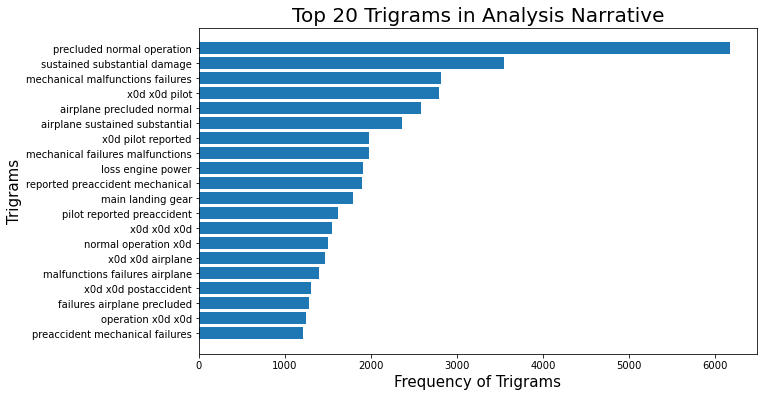

In [297]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_tris.sort_values().index, width=top20_an_tris.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Analysis Narrative', size=20)
plt.savefig('./images/top20an_trigrams.png', bbox_inches='tight');

---

## NLP on Death/Injury Reports

In [251]:
df_death_or_injuries = df[df['deaths_and_injuries'] > 0]
df_death_or_injuries

,has_safety_rec,probable_cause,city,country,date,state,event_type,airport_name,analysis_narrative,factual_narrative,fatalities,minor_injuries,serious_injuries,flight_condition,make,model,registration,operator,owner,flight_operation,sightseeing,second_pilot,deaths_and_injuries
3,False,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,ACC,UNKNOWN,N/A,N/A,2.0,0.0,0.0,VMC,CESSNA,172H,N2876L,PRICE MICHAEL W,PRICE MICHAEL W,PERS,False,False,2.0
4,False,The inherent limitations of the see-and-avoid ...,Weyers Cave,USA,2010-12-31T15:26:00Z,VA,ACC,UNKNOWN,N/A,N/A,2.0,0.0,0.0,VMC,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2,N312PH,PHI INC,PHI INC,POSI,False,False,2.0
16,False,The pilot's intentional flight into terrain.,Loveland,USA,2010-12-27T15:36:00Z,CO,ACC,UNKNOWN,The airplane departed a local airport and mane...,The accident airplane was a 1962 model Cessna ...,1.0,0.0,0.0,VMC,CESSNA,210B,N200EP,CULLUM CHUCK R JR,CULLUM CHUCK R JR,PERS,False,False,1.0
24,False,The pilot's failure to recognize the onset of ...,Glendale,USA,2010-12-23T15:21:00Z,AZ,ACC,GLENDALE MUNICIPAL,The owner/pilot of the experimental amateur-bu...,HISTORY OF FLIGHT &#x0D;\n&#x0D;\nOn December ...,0.0,0.0,1.0,VMC,Schaefer,Kitfox 4,N95FT,UNKNOWN,UNKNOWN,PERS,False,False,1.0
26,False,The pilot's decision to operate in known moder...,Dundee,USA,2010-12-22T20:50:00Z,NY,ACC,PENN YAN,Prior to departing on the night instrument met...,HISTORY OF FLIGHT&#x0D;\n&#x0D;\nOn December 2...,1.0,0.0,0.0,IMC,MOONEY,M20R,N968SM,ROCKLAND AVIATION LLC,ROCKLAND AVIATION LLC,PERS,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,False,N/A,Vineland,USA,2021-01-11T13:30:00Z,NJ,ACC,VINELAND-DOWNSTOWN AIRPORT,N/A,N/A,1.0,0.0,0.0,VMC,KOLB,FIRESTAR,UNREG,UNKNOWN,UNKNOWN,PERS,False,False,1.0
19886,False,The student pilot’s improper landing flare and...,Palouse,USA,2021-01-08T15:00:00Z,WA,ACC,SCHOEPFLIN,The flight instructor of the tailwheel equippe...,N/A,0.0,1.0,0.0,VMC,CESSNA,170B,N4344B,UNKNOWN,UNKNOWN,INST,False,True,1.0
19891,False,N/A,Cash,USA,2021-01-04T10:33:00Z,AR,ACC,UNKNOWN,N/A,N/A,2.0,0.0,0.0,VMC,HAWKER BEECHCRAFT CORP,G58,N325GC,UNKNOWN,"STRATUS SALES, LLC",PERS,False,False,2.0
19895,False,N/A,New Hudson,USA,2021-01-02T16:41:00Z,MI,ACC,OAKLAND SOUTHWEST,N/A,N/A,3.0,0.0,0.0,IMC,PIPER,PA-24-250,N8347P,UNKNOWN,UNKNOWN,PERS,False,False,3.0


---

### NLP on Probable Cause with Death/Injury Result

In [253]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_death_or_injuries['probable_cause'])
pc_d_or_i_cvec = cvec.transform(df_death_or_injuries['probable_cause'])

In [254]:
pc_d_or_i_unigrams = pd.DataFrame(pc_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
pc_d_or_i_unigrams

,000,10,100,11,12,14,15,16,17,18,180,19,20,2012,2015,2016,21,23,24v,270,28,30,40,406,42,...,withdrawal,wood,wooded,wooden,work,worker,working,workload,works,worn,worsened,worsening,wreckage,wrist,wrong,xm,yaw,year,years,yield,yoke,zero,zipline,zolpidem,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
top20_pc_unis_with_death_injury = pc_d_or_i_unigrams.sum().sort_values(ascending=False).head(20)
top20_pc_unis_with_death_injury

pilot           5358
resulted        3123
failure         3078
loss            2826
engine          2336
airplane        2235
control         2055
power           1922
maintain        1911
flight          1721
landing         1483
fuel            1375
contributing    1354
accident        1330
subsequent       902
takeoff          896
conditions       887
stall            880
terrain          831
decision         822
dtype: int64

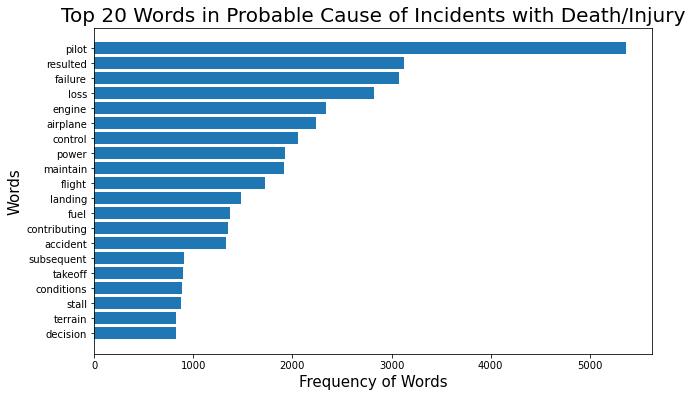

In [256]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_unis_with_death_injury.sort_values().index, width=top20_pc_unis_with_death_injury.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Probable Cause of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20pc_words_with_death_or_injury.png', bbox_inches='tight');

In [258]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2))
cvec.fit(df_death_or_injuries['probable_cause'])
pc_d_or_i_cvec = cvec.transform(df_death_or_injuries['probable_cause'])

In [259]:
pc_d_or_i_bigrams = pd.DataFrame(pc_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
pc_d_or_i_bigrams

,000 rpm,10 feet,100 hour,100 hours,11 failure,12 500,14 cfr,14 code,15 2012,16 cessna,17 months,18 2015,180 degree,180 turn,19 story,20 knot,2012 docket,2015 docket,2016 public,21 2016,23 appendix,24v battery,270 degree,28 pilot,30 minutes,...,wrist pin,wrong canyon,wrong engine,wrong fuel,wrong route,wrong runway,xm gps,yaw bounced,yaw control,yaw damper,yaw ground,yaw operating,yaw stability,yaw subsequent,year limits,year old,year time,years accident,years prior,yield taxiing,yoke correct,yoke installed,yoke lift,zero timed,zolpidem lorazepam
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [260]:
top20_pc_bis_with_death_injury = pc_d_or_i_bigrams.sum().sort_values(ascending=False).head(20)
top20_pc_bis_with_death_injury

pilot failure            2000
failure maintain         1662
engine power             1590
loss engine              1528
contributing accident    1212
accident pilot            721
total loss                709
aerodynamic stall         709
reasons determined        573
airplane control          529
loss control              471
pilot improper            467
pilot decision            437
low altitude              431
angle attack              414
resulted aerodynamic      408
critical angle            405
maintain adequate         390
resulted loss             381
pilot inadequate          373
dtype: int64

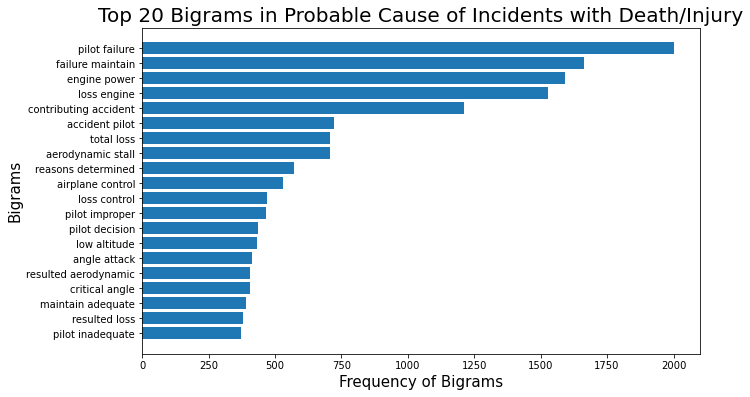

In [261]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_bis_with_death_injury.sort_values().index, width=top20_pc_bis_with_death_injury.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Probable Cause of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20pc_bigrams_with_death_or_injury.png', bbox_inches='tight');

In [262]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3))
cvec.fit(df_death_or_injuries['probable_cause'])
pc_d_or_i_cvec = cvec.transform(df_death_or_injuries['probable_cause'])

In [263]:
pc_d_or_i_trigrams = pd.DataFrame(pc_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
pc_d_or_i_trigrams

,10 feet ground,100 hour inspection,100 hours required,11 failure maintain,12 500 feet,14 cfr 23,14 code federal,15 2012 docket,16 cessna contributing,17 months accident,18 2015 docket,180 degree return,180 degree turn,180 turn following,19 story building,20 knot tailwind,2012 docket accident,2015 docket accident,2016 public docket,21 2016 public,23 appendix design,24v battery resulted,270 degree practice,28 pilot avoid,30 minutes use,...,yaw control hard,yaw control hovering,yaw control inadequately,yaw control landing,yaw control operating,yaw control slowed,yaw control subsequent,yaw control takeoff,yaw control transitioning,yaw damper flight,yaw ground impact,yaw operating conditions,yaw stability low,yaw subsequent hard,yaw subsequent impact,yaw subsequent loss,year limits recommended,year old ignition,year time limit,yield taxiing aircraft,yoke correct drift,yoke installed pilot,yoke lift feet,zero timed company,zolpidem lorazepam diphenhydramine
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [264]:
top20_pc_tris_with_death_injury = pc_d_or_i_trigrams.sum().sort_values(ascending=False).head(20)
top20_pc_tris_with_death_injury

loss engine power                       1513
pilot failure maintain                  1380
contributing accident pilot              702
total loss engine                        677
resulted aerodynamic stall               407
critical angle attack                    405
failure maintain adequate                344
engine power fuel                        338
loss airplane control                    295
maintain adequate airspeed               289
failure maintain clearance               274
instrument meteorological conditions     274
partial loss engine                      264
reasons determined postaccident          250
airplane critical angle                  241
exceedance airplane critical             236
determined postaccident examination      221
precluded normal operation               218
maintain airplane control                211
power reasons determined                 210
dtype: int64

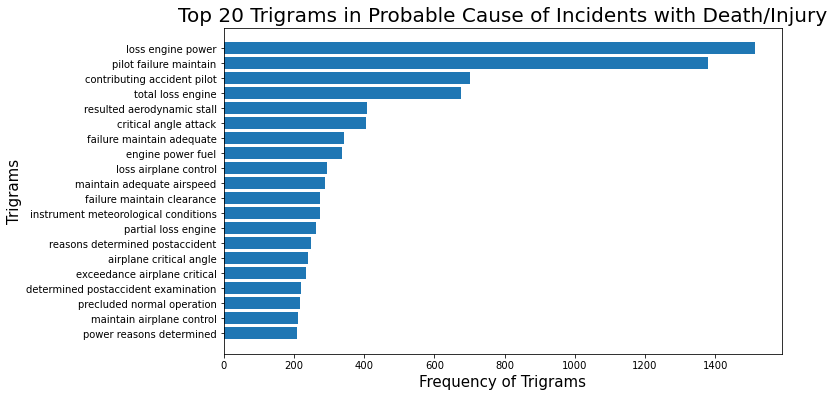

In [265]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_pc_tris_with_death_injury.sort_values().index, width=top20_pc_tris_with_death_injury.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Probable Cause of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20pc_trigrams_with_death_or_injury.png', bbox_inches='tight');

---

### NLP on  Factual Narrative with Death/Injury Result

In [268]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_death_or_injuries['factual_narrative'])
fn_d_or_i_cvec = cvec.transform(df_death_or_injuries['factual_narrative'])

In [269]:
fn_d_or_i_unigrams = pd.DataFrame(fn_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
fn_d_or_i_unigrams

,00,000,0000,00000kt,00001,00004,00007,0000z,0001,000119,0002,000235,00024,0003,0003f,0004,0005,000551,000594,0006,0007,00070,0008,00083,0009,...,zoomed,zooming,zoot,zopiclone,zorix,zotmi,zovoc,zp,zph,zslc,zuehl,zulu,zuni,zurich,zweibruken,zwiebelturm,zyban,zyfs200k,zygloe,zyloprim,zyr,zyrtec,zzv,µg,µm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
top20_fn_unis_with_death_injury = fn_d_or_i_unigrams.sum().sort_values(ascending=False).head(20)
top20_fn_unis_with_death_injury

x0d         167435
airplane     67995
pilot        67338
flight       46958
engine       42333
accident     32458
fuel         29045
time         21207
left         18632
right        17032
feet         16235
reported     15634
hours        15023
wing         14491
airport      14490
control      13872
impact       13429
runway       13280
faa          12914
damage       12255
dtype: int64

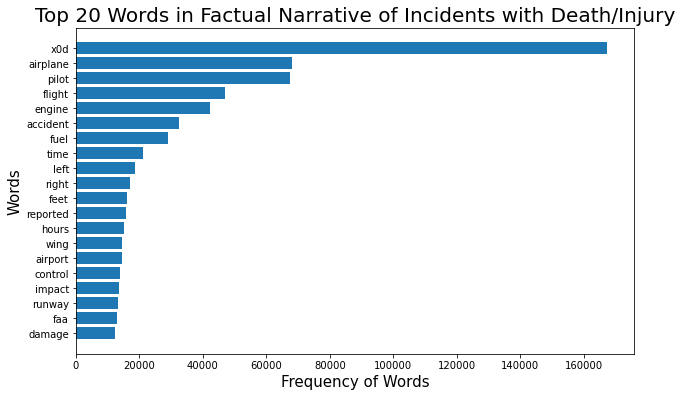

In [284]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_unis_with_death_injury.sort_values().index, width=top20_fn_unis_with_death_injury.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Factual Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20fn_words_with_death_or_injury.png', bbox_inches='tight');

In [292]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)
cvec.fit(df_death_or_injuries['factual_narrative'])
fn_d_or_i_cvec = cvec.transform(df_death_or_injuries['factual_narrative'])

In [293]:
fn_d_or_i_bigrams = pd.DataFrame(fn_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
fn_d_or_i_bigrams

,000 000,000 feet,000 foot,000 ft,000 hours,000 rpm,000 total,020 degrees,04 inches,09 35,10 000,10 15,10 2010,10 2011,10 2012,10 2014,10 degrees,10 feet,10 ft,10 gallons,10 hours,10 inches,10 knots,10 miles,10 minutes,...,x0d takeoff,x0d telephone,x0d test,x0d tests,x0d throttle,x0d time,x0d toxicological,x0d toxicology,x0d upper,x0d vacuum,x0d vertical,x0d video,x0d visual,x0d weather,x0d weight,x0d wind,x0d wing,x0d wings,x0d witness,x0d witnesses,x0d wreckage,x0d written,x0d x0d,year old,µg ml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,49,0,0
4,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
top20_fn_bis_with_death_injury = fn_d_or_i_bigrams.sum().sort_values(ascending=False).head(20)
top20_fn_bis_with_death_injury

x0d x0d                      82174
accident site                 6962
remained attached             6111
information x0d               5795
x0d pilot                     5747
x0d according                 5129
pilot reported                5034
accident airplane             4596
landing gear                  4279
code federal                  4251
federal regulations           4240
14 code                       4232
time accident                 4224
flight plan                   4139
meteorological conditions     4098
federal aviation              3831
aviation administration       3703
left wing                     3628
visual meteorological         3576
right wing                    3565
dtype: int64

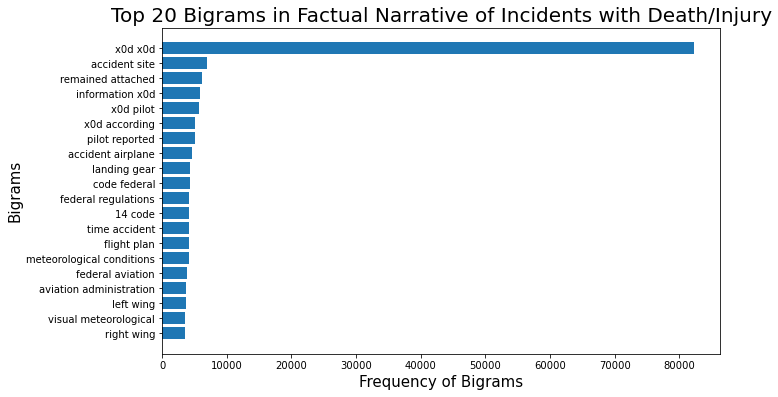

In [295]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_bis_with_death_injury.sort_values().index, width=top20_fn_bis_with_death_injury.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Factual Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20fn_bigrams_with_death_or_injury.png', bbox_inches='tight');

In [288]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3), max_features=5000)
cvec.fit(df_death_or_injuries['factual_narrative'])
fn_d_or_i_cvec = cvec.transform(df_death_or_injuries['factual_narrative'])

In [289]:
fn_d_or_i_trigrams = pd.DataFrame(fn_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
fn_d_or_i_trigrams

,00 inches mercury,000 000 feet,000 000 ft,000 feet agl,000 feet broken,000 feet ground,000 feet long,000 feet mean,000 feet minute,000 feet msl,000 feet overcast,000 feet pilot,000 feet temperature,000 feet visibility,000 feet wind,000 feet x0d,000 flight hours,000 ft agl,000 ft ground,000 ft mean,000 ft msl,000 ft pilot,000 ft temperature,000 ft x0d,000 hours total,...,x0d x0d testing,x0d x0d tests,x0d x0d throttle,x0d x0d time,x0d x0d title,x0d x0d toxicological,x0d x0d toxicology,x0d x0d turbocharger,x0d x0d upper,x0d x0d vacuum,x0d x0d vertical,x0d x0d video,x0d x0d visual,x0d x0d warning,x0d x0d weather,x0d x0d weight,x0d x0d wind,x0d x0d wing,x0d x0d wings,x0d x0d witness,x0d x0d witnesses,x0d x0d wreckage,x0d x0d written,x0d x0d x0d,year old pilot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,0
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [290]:
top20_fn_tris_with_death_injury = fn_d_or_i_trigrams.sum().sort_values(ascending=False).head(20)
top20_fn_tris_with_death_injury

information x0d x0d                    5480
x0d x0d pilot                          5335
x0d x0d x0d                            5246
x0d x0d according                      4856
code federal regulations               4230
14 code federal                        4225
federal aviation administration        3702
visual meteorological conditions       3561
meteorological conditions prevailed    3462
federal regulations 91                 3385
x0d x0d airplane                       3295
flight plan filed                      2916
aviation administration faa            2685
x0d x0d examination                    2306
x0d x0d engine                         2297
flight x0d x0d                         2122
airplane single engine                 2083
conditions prevailed flight            2066
single engine land                     1977
sustained substantial damage           1905
dtype: int64

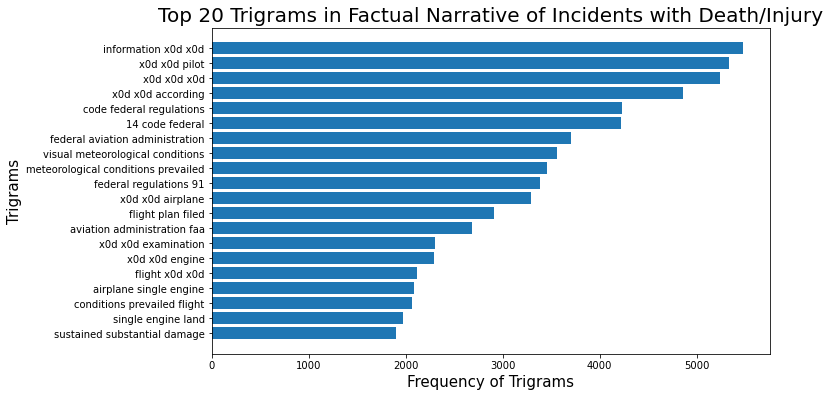

In [291]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_fn_tris_with_death_injury.sort_values().index, width=top20_fn_tris_with_death_injury.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Factual Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20fn_trigrams_with_death_or_injury.png', bbox_inches='tight');

---

### NLP on  Analysis Narrative with Death/Injury Result

In [281]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_death_or_injuries['analysis_narrative'])
an_d_or_i_cvec = cvec.transform(df_death_or_injuries['analysis_narrative'])

In [282]:
an_d_or_i_unigrams = pd.DataFrame(an_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
an_d_or_i_unigrams

,00,000,0008,000rpm,001,0013,0015,002,003,004,005,0055,0060,008,009,01,010,0120,0122,013,0137,015,016,02,020,...,yocarditis,yohimbine,yoke,york,young,younger,yup,yxu,zab,zero,zigzag,zinc,zip,zipline,zoloft,zolpidem,zone,zones,zoom,zoomed,zulu,zurich,zyban,zyrtec,µg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
top20_an_unis_with_death_injury = an_d_or_i_unigrams.sum().sort_values(ascending=False).head(20)
top20_an_unis_with_death_injury

airplane       25429
pilot          24041
x0d            14946
engine         11895
flight         11477
accident        8381
fuel            7936
reported        6408
power           6172
left            4992
landing         4944
runway          4901
examination     4821
revealed        4433
airport         4388
right           4240
ground          4215
did             4118
likely          3631
normal          3603
dtype: int64

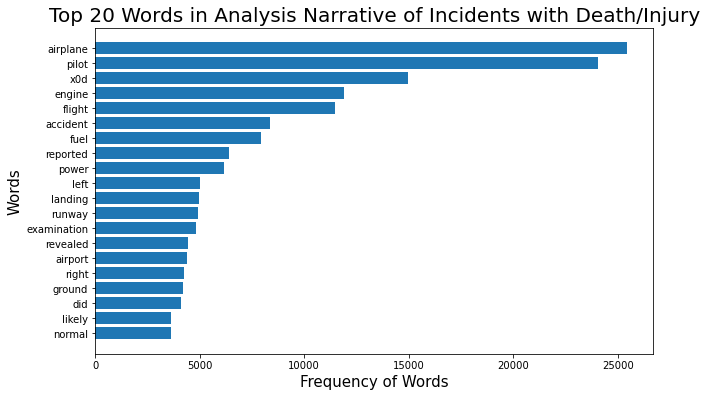

In [287]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_unis_with_death_injury.sort_values().index, width=top20_an_unis_with_death_injury.sort_values())
plt.xlabel('Frequency of Words', size=15)
plt.ylabel('Words', size=15)
plt.title('Top 20 Words in Analysis Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20an_words_with_death_or_injury.png', bbox_inches='tight');

In [299]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)
cvec.fit(df_death_or_injuries['analysis_narrative'])
an_d_or_i_cvec = cvec.transform(df_death_or_injuries['analysis_narrative'])

In [300]:
an_d_or_i_bigrams = pd.DataFrame(an_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
an_d_or_i_bigrams

,000 feet,000 foot,000 fpm,000 ft,000 rpm,10 000,10 15,10 degrees,10 feet,10 ft,10 gallons,10 hours,10 knot,10 knots,10 miles,10 minutes,10 seconds,100 150,100 200,100 feet,100 foot,100 ft,100 hour,100 knots,100 yards,...,x0d ntsb,x0d operator,x0d pilot,x0d pilots,x0d postaccident,x0d radar,x0d recorded,x0d review,x0d student,x0d time,x0d toxicological,x0d toxicology,x0d video,x0d weather,x0d witness,x0d witnesses,x0d wreckage,x0d x0d,yaw left,yawed left,yawed right,year accident,year old,years accident,years prior
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
top20_an_bis_with_death_injury = an_d_or_i_bigrams.sum().sort_values(ascending=False).head(20)
top20_an_bis_with_death_injury

x0d x0d                     7436
pilot reported              3210
precluded normal            2707
normal operation            2696
postaccident examination    1990
engine power                1960
mechanical malfunctions     1558
substantial damage          1385
time accident               1360
loss engine                 1206
malfunctions failures       1186
flight instructor           1093
accident site               1060
x0d pilot                   1058
pilot stated                 961
landing gear                 954
ground level                 929
airplane impacted            927
examination airplane         913
preimpact mechanical         908
dtype: int64

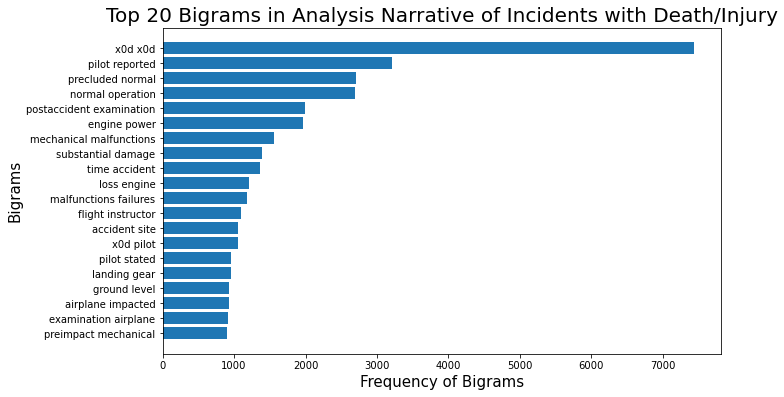

In [302]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_bis_with_death_injury.sort_values().index, width=top20_an_bis_with_death_injury.sort_values())
plt.xlabel('Frequency of Bigrams', size=15)
plt.ylabel('Bigrams', size=15)
plt.title('Top 20 Bigrams in Analysis Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20an_bigrams_with_death_or_injury.png', bbox_inches='tight');

In [303]:
cvec = CountVectorizer(stop_words='english', ngram_range=(3,3), max_features=5000)
cvec.fit(df_death_or_injuries['analysis_narrative'])
an_d_or_i_cvec = cvec.transform(df_death_or_injuries['analysis_narrative'])

In [304]:
an_d_or_i_trigrams = pd.DataFrame(an_d_or_i_cvec.todense(), columns=cvec.get_feature_names())
an_d_or_i_trigrams

,000 feet agl,000 feet ground,000 feet mean,000 feet minute,000 feet msl,000 feet pilot,000 foot long,000 ft agl,000 ft airplane,000 ft ground,000 ft long,000 ft mean,000 ft minute,000 ft msl,000 ft runway,10 000 feet,10 000 ft,10 500 ft,10 degrees flaps,10 feet ground,10 ft ground,10 gallons fuel,10 gallons hour,10 knots gusting,10 miles south,...,x0d x0d radar,x0d x0d recorded,x0d x0d review,x0d x0d right,x0d x0d scene,x0d x0d student,x0d x0d subsequent,x0d x0d takeoff,x0d x0d time,x0d x0d toxicological,x0d x0d toxicology,x0d x0d video,x0d x0d visual,x0d x0d weather,x0d x0d weight,x0d x0d wind,x0d x0d witness,x0d x0d witnesses,x0d x0d wreckage,x0d x0d x0d,x0d x0d years,year old pilot,years accident engine,years accident pilot,years prior accident
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [305]:
top20_an_tris_with_death_injury = an_d_or_i_trigrams.sum().sort_values(ascending=False).head(20)
top20_an_tris_with_death_injury

precluded normal operation           2585
loss engine power                    1166
mechanical malfunctions failures     1128
x0d x0d pilot                         992
x0d x0d x0d                           894
sustained substantial damage          788
x0d x0d postaccident                  725
x0d postaccident examination          673
cross country flight                  663
failures precluded normal             652
anomalies precluded normal            650
malfunctions failures precluded       628
normal operation x0d                  591
ft ground level                       570
preimpact mechanical malfunctions     563
examination airframe engine           547
airplane precluded normal             527
postaccident examination airplane     514
federal aviation administration       510
operation x0d x0d                     506
dtype: int64

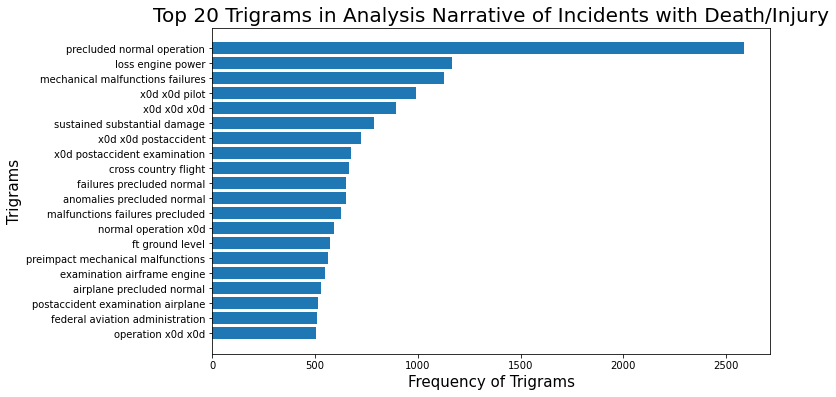

In [306]:
plt.figure(figsize=(10,6))
plt.barh(y=top20_an_tris_with_death_injury.sort_values().index, width=top20_an_tris_with_death_injury.sort_values())
plt.xlabel('Frequency of Trigrams', size=15)
plt.ylabel('Trigrams', size=15)
plt.title('Top 20 Trigrams in Analysis Narrative of Incidents with Death/Injury', size=20)
plt.savefig('./images/top20an_trigrams_with_death_or_injury.png', bbox_inches='tight');

---